In [1]:
import pandas as pd
import random
import pprint
import sklearn.datasets as datasets
import sys

sys.path.insert(1, '..')
from check_data_consistency import DataConsistencyChecker

In [2]:
# This notebook provides an example of working with a sample toy
# dataset available through sklearn.

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 10000

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

# Breast cancer

In [5]:
# Load the data
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Run DataConsistencyChecker with default parameters, other than verbose=0
# to skip printing the test IDs as the tests exectute. 
dc = DataConsistencyChecker(verbose=0)  
dc.init_data(df)
_ = dc.check_data_quality()


Data consistency check complete.
Analysed 569 rows, 30 columns
Executed 149 tests.

Patterns without Exceptions:
Found 353 patterns without exceptions
16 tests (10.74% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 58 patterns with exceptions
10 tests (6.71% of tests) flagged at least one exception each.
Flagged 35 row(s) with at least one exception.
Flagged 30 column(s) with at least one exception.


In [6]:
# Get an overview of every test. For each, we get both the number of patterns found
# and the number of exceptions found. It may be informative where no patterns were
# found, if they would be expected. Other APIs can examine intances of these more
# closely. 

dc.summarize_patterns_and_exceptions()

,Test ID,Number Patterns without Exceptions,Number Patterns with Exceptions
0,MISSING_VALUES,30,
1,RARE_VALUES,,
2,UNIQUE_VALUES,,
3,PREV_VALUES_DT,,
4,MATCHED_MISSING,,
5,UNMATCHED_MISSING,,
6,SAME_VALUES,,
7,SAME_OR_CONSTANT,,
8,POSITIVE,30,
9,NEGATIVE,,


In [7]:
# Get a summary of which patterns were present in which columns. It
# may be as informative where the pattern is not present. 

dc.summarize_patterns_by_test_and_feature()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Test ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MISSING_VALUES,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔
POSITIVE,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔
NUMBER_DECIMALS,✔,✔,✔,✔,✔,✔,,✔,✔,✔,✔,✔,✔,✔,✔,✔,,✔,✔,✔,✔,✔,✔,✔,✔,✔,,,✔,✔
UNUSUAL_ORDER_MAGNITUDE,✔,,✔,,,,,,,,,,,,,,,,,,,,✔,,,,,,,
NON_ZERO,✔,✔,✔,✔,✔,✔,,,✔,✔,✔,✔,✔,✔,✔,✔,,,✔,✔,✔,✔,✔,✔,✔,✔,,,✔,✔
LESS_THAN_ONE,,,,,✔,✔,✔,✔,✔,✔,,,,,✔,✔,✔,✔,✔,✔,,,,,✔,,,✔,✔,✔
GREATER_THAN_ONE,✔,✔,✔,✔,,,,,,,,,,✔,,,,,,,✔,✔,✔,✔,,,,,,
LARGER,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔,✔
MUCH_LARGER,✔,✔,✔,✔,✔,✔,,,✔,✔,✔,✔,✔,✔,✔,✔,,,✔,✔,✔,✔,✔,✔,✔,✔,,,✔,✔


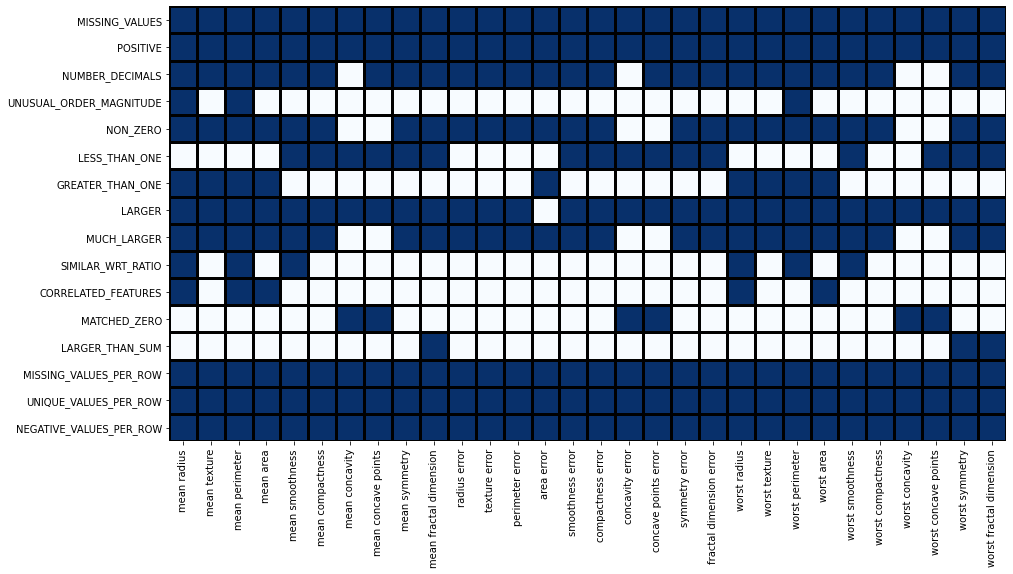

In [8]:
# View the above in the form of a heatmap. In practice, one or the other
# format would be used and not both. 

_ = dc.summarize_patterns_by_test_and_feature(heatmap=True)

In [9]:
# List each pattern found in more detail. This lists every pattern found, and for each,
# the Test ID, the column or set of columns where the pattern was found, and a 
# description of the pattern. This lists only patterns that have no exceptions. 

dc.get_patterns_summary()

,Test ID,Column(s),Description of Pattern
113,LESS_THAN_ONE,mean smoothness,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
114,LESS_THAN_ONE,mean compactness,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
115,LESS_THAN_ONE,mean concavity,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
116,LESS_THAN_ONE,mean concave points,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
117,LESS_THAN_ONE,mean symmetry,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
118,LESS_THAN_ONE,mean fractal dimension,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
119,LESS_THAN_ONE,smoothness error,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
120,LESS_THAN_ONE,compactness error,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
121,LESS_THAN_ONE,concavity error,"The column consistently contains values between -1.0, and 1.0 (inclusive)"
122,LESS_THAN_ONE,concave points error,"The column consistently contains values between -1.0, and 1.0 (inclusive)"


In [10]:
# This provides a similar report, except for the patterns that have exceptions. 
# Here, the number of exceptions found, as well as Issue ID are also included.
# Issue ID may be used in calls to display_detailed_results() to focus on this
# specific issue if desired. 

dc.get_exceptions_summary()

,Test ID,Column(s),Description of Pattern,Number of Exceptions,Issue ID
0,NUMBER_DECIMALS,mean concavity,"The column contains values consistently with 0, 2, 3, 4, 5 decimals, with exceptions.",1,0
1,NUMBER_DECIMALS,concavity error,"The column contains values consistently with 0, 2, 3, 4, 5 decimals, with exceptions.",2,1
2,NUMBER_DECIMALS,worst concave points,"The column contains values consistently with 0, 2, 3, 4 decimals, with exceptions.",2,2
3,UNUSUAL_ORDER_MAGNITUDE,area error,"This test checks for values of an unusual order of magnitude, etc. Each value is described in terms of its order, or powers of 10. For example 10 is order 1, 100 is order 2, 1000 is order 3, etc. All numbers are rounded to the nearest order of magnitude. The column contains values in the range 6.802 to 542.2, and consistently in the order of 1.0 or 2.0, with exceptions.",2,3
4,FEW_NEIGHBORS,mean area,The test marked any values more than 235.750 away from both the next smallest and next largest values in the column.,1,4
5,FEW_NEIGHBORS,radius error,The test marked any values more than 0.276 away from both the next smallest and next largest values in the column.,1,5
6,FEW_NEIGHBORS,perimeter error,The test marked any values more than 2.122 away from both the next smallest and next largest values in the column.,1,6
7,FEW_NEIGHBORS,concavity error,The test marked any values more than 0.040 away from both the next smallest and next largest values in the column.,1,7
8,FEW_NEIGHBORS,fractal dimension error,The test marked any values more than 0.003 away from both the next smallest and next largest values in the column.,1,8
9,FEW_NEIGHBORS,worst fractal dimension,The test marked any values more than 0.015 away from both the next smallest and next largest values in the column.,1,9


In [11]:
# summarize_exceptions_by_test() gives a sense of which tests are 
# identifying the most exceptions in this dataset. This may indicate
# where more attention should be focussed, or in other cases, where
# the most issues should be cleared to reduce noise, if any may be
# deemed insignificant, or already understood. 

dc.summarize_exceptions_by_test()

,Number of Columns Flagged At Least Once,Number of Issues Total
Test ID,,
NUMBER_DECIMALS,3,5
UNUSUAL_ORDER_MAGNITUDE,1,2
FEW_NEIGHBORS,6,6
VERY_LARGE,5,9
LESS_THAN_ONE,1,1
LARGER,17,20
MUCH_LARGER,11,14
SIMILAR_WRT_RATIO,3,5
RARE_COMBINATION,10,13


In [12]:
# display_most_flagged_rows() lists the rows with the highest scores, highlights
# the cells that are flagged at least once, and indicates which tests flagged
# these cells. 

dc.display_most_flagged_rows()

**Row: 212 — Final Score: 13**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,28.110000,18.470000,188.500000,2499.000000,0.114200,0.151600,0.320100,0.159500,0.164800,0.055250,2.873000,1.476000,21.980000,525.600000,0.013450,0.027720,0.063890,0.014070,0.047830,0.004476,28.110000,18.470000,188.500000,2499.000000,0.114200,0.151600,0.320100,0.159500,0.164800,0.055250
1,UNUSUAL_ORDER_MAGNITUDE,,,,,,,,,,,,,,✔,,,,,,,,,,,,,,,,
2,LARGER,,✔,,,,,,✔,,,,,✔,,,,,,,,,✔,,,,✔,,,,
3,MUCH_LARGER,✔,✔,✔,,,,,,,,✔,,✔,,,,,,,,✔,✔,✔,,,,,,,
4,SIMILAR_WRT_RATIO,,,,,✔,,,,,,,,,,,,,,,,,,,,,,,,,✔
5,RARE_COMBINATION,,,,,,,✔,,,,,,,,,,,,✔,,,,,,,,,,,
6,LARGER_THAN_SUM,,,,,✔,,,,,✔,,,,,,,,,,,,,,,,,,,✔,


**Row: 9 — Final Score: 5**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500
1,VERY_LARGE,,,,,,,,,,,,,,,,,,,,,,,,,,✔,,,,✔
2,LESS_THAN_ONE,,,,,,,,,,,,,,,,,,,,,,,,,,✔,,,,
3,LARGER,,,,,,,,,✔,,,,,,,,,,,,,,,,,,,,,✔
4,SIMILAR_WRT_RATIO,,,,,,,,,,✔,,,,,,,,,,,,,,,,,,,,✔


**Row: 12 — Final Score: 4**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,19.170000,24.800000,132.400000,1123.000000,0.097400,0.245800,0.206500,0.111800,0.239700,0.078000,0.955500,3.568000,11.070000,116.200000,0.003139,0.082970,0.088900,0.040900,0.044840,0.012840,20.960000,29.940000,151.700000,1332.000000,0.103700,0.390300,0.363900,0.176700,0.317600,0.102300
1,VERY_LARGE,,,,,,,,,,,,,,,,,,✔,,,,,,,,,,,,
2,RARE_COMBINATION,,,,,,✔,,✔,,,,✔,,,,,,,✔,,,,,,,,,,,


**Row: 152 — Final Score: 4**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,9.731000,15.340000,63.780000,300.200000,0.107200,0.159900,0.410800,0.078570,0.254800,0.092960,0.824500,2.664000,4.073000,49.850000,0.010970,0.095860,0.396000,0.052790,0.035460,0.029840,11.020000,19.490000,71.040000,380.500000,0.129200,0.277200,0.821600,0.157100,0.310800,0.125900
1,VERY_LARGE,,,,,,,,,,,,,,,,,,✔,,,,,,,,,,,,
2,LARGER,,,,,,,,,,,,,,,,,✔,,,,,,,,,✔,,,✔,
3,MUCH_LARGER,,,,,,,,,,,,,,,,,,,,✔,,,,,,✔,,,,


**Row: 3 — Final Score: 4**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
1,FEW_NEIGHBORS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,✔
2,VERY_LARGE,,,,,,,,,,✔,,,,,,,,,,,,,,,,,,,,✔
3,RARE_COMBINATION,,,,,,,,,,,,,,,,,,,✔,,,,,,,✔,,,,


**Row: 461 — Final Score: 3**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,27.420000,26.270000,186.900000,2501.000000,0.108400,0.198800,0.363500,0.168900,0.206100,0.056230,2.547000,1.306000,18.650000,542.200000,0.007650,0.053740,0.080550,0.025980,0.016970,0.004558,36.040000,31.370000,251.200000,4254.000000,0.135700,0.425600,0.683300,0.262500,0.264100,0.074270
1,UNUSUAL_ORDER_MAGNITUDE,,,,,,,,,,,,,,✔,,,,,,,,,,,,,,,,
2,FEW_NEIGHBORS,,,,,,,,,,,✔,,✔,,,,,,,,,,,,,,,,,


**Row: 122 — Final Score: 3**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,24.250000,20.200000,166.200000,1761.000000,0.144700,0.286700,0.426800,0.201200,0.265500,0.068770,1.509000,3.120000,9.807000,233.000000,0.023330,0.098060,0.127800,0.018220,0.045470,0.009875,26.020000,23.990000,180.900000,2073.000000,0.169600,0.424400,0.580300,0.224800,0.322200,0.080090
1,RARE_COMBINATION,,,,✔,,,,,,,,✔,,,,✔,,,✔,,,,,,,,,,,


**Row: 376 — Final Score: 3**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,10.570000,20.220000,70.150000,338.300000,0.090730,0.166000,0.228000,0.059410,0.218800,0.084500,0.111500,1.231000,2.363000,7.228000,0.008499,0.076430,0.153500,0.029190,0.016170,0.012200,10.850000,22.820000,76.510000,351.900000,0.114300,0.361900,0.603000,0.146500,0.259700,0.120000
1,LARGER,,,,,,,,,,,✔,,,,,,✔,,,,,,,,,,,,,✔
2,MUCH_LARGER,,,,,,,,,,,✔,,,,,,,,,✔,,,,,,,,,,


**Row: 192 — Final Score: 3**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,9.720000,18.220000,60.730000,288.100000,0.069500,0.023440,0.000000,0.000000,0.165300,0.064470,0.353900,4.885000,2.230000,21.690000,0.001713,0.006736,0.000000,0.000000,0.037990,0.001688,9.968000,20.830000,62.250000,303.800000,0.071170,0.027290,0.000000,0.000000,0.190900,0.065590
1,VERY_LARGE,,,,,,,,,,,,✔,,,,,,,,,,,,,,,,,,
2,LARGER,,,,,,✔,,,,,,,,,,,,,✔,,,,,,,✔,,,,


**Row: 314 — Final Score: 3**

,Test ID,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,,8.597000,18.600000,54.090000,221.200000,0.107400,0.058470,0.000000,0.000000,0.216300,0.073590,0.336800,2.777000,2.222000,17.810000,0.020750,0.014030,0.000000,0.000000,0.061460,0.006820,8.952000,22.440000,56.650000,240.100000,0.134700,0.077670,0.000000,0.000000,0.314200,0.081160
1,LARGER,,,,,,✔,,,,,,,,,,,,,✔,,,,,,,,,,,
2,RARE_COMBINATION,,,,,,,,,,,,✔,,,✔,,,,✔,,,,,,,,,,,


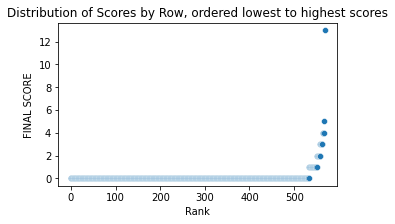

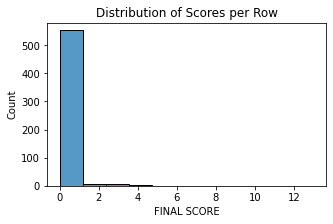

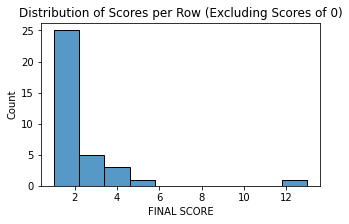

In [13]:
# Get a breakdown of the distribution of scores. This can assist,
# for example, indetermining if there is a cut-off if users wish 
# to set a binary flag distinguishing inliers from outliers. 

dc.plot_final_scores_distribution_by_row()

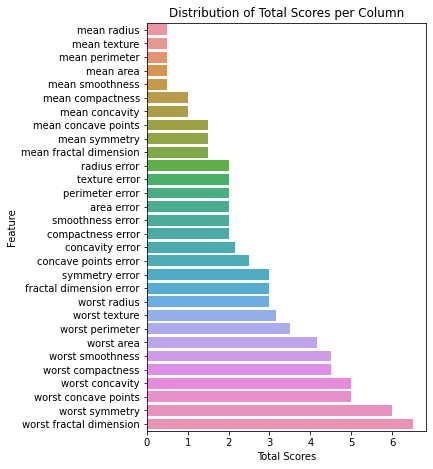

In [14]:
# Examine which features tend to be flagged the most

dc.plot_final_scores_distribution_by_feature()

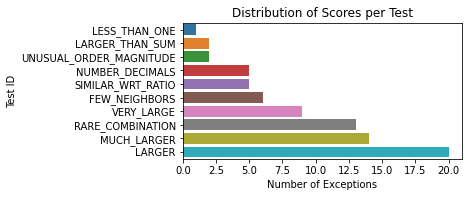

In [15]:
# Examine which tests tend to flag the most

dc.plot_final_scores_distribution_by_test()

In [16]:
# Look at the 'NUMBER_DECIMALS' test more closely, listing all 
# patterns with exceptions.

dc.display_detailed_results(test_id_list=['NUMBER_DECIMALS'], show_patterns=False)

Displaying results for tests: 'NUMBER_DECIMALS'

### Column(s): mean concavity

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.


**Description**: The column contains values consistently with 0, 2, 3, 4, 5 decimals, with exceptions.

**Number of exceptions**: 1 (0.1757% of rows)

**Examples of values NOT flagged**:

,mean concavity,Number decimals
37,0.02562,5
298,0.02475,5
310,0.01583,5
346,0.00751,5
383,0.05892,5
440,0.09457,5
458,0.01206,5
513,0.08222,5
516,0.1569,4
539,0.09252,5


**Flagged values**:

,mean concavity,Number decimals
333,0.0009737,7


### Column(s): concavity error

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.


**Description**: The column contains values consistently with 0, 2, 3, 4, 5 decimals, with exceptions.

**Number of exceptions**: 2 (0.3515% of rows)

**Examples of values NOT flagged**:

,concavity error,Number decimals
37,0.01343,5
298,0.01079,5
310,0.01042,5
346,0.005832,6
384,0.02828,5
441,0.04942,5
459,0.0145,4
514,0.02967,5
517,0.03052,5
540,0.05553,5


**Flagged values**:

,concavity error,Number decimals
333,0.0009737,7
360,0.0007929,7


### Column(s): worst concave points

**Issue ID**: 2

A strong pattern, and exceptions to the pattern, were found.


**Description**: The column contains values consistently with 0, 2, 3, 4 decimals, with exceptions.

**Number of exceptions**: 2 (0.3515% of rows)

**Examples of values NOT flagged**:

,worst concave points,Number decimals
37,0.05013,5
300,0.198,3
312,0.08411,5
347,0.1251,4
384,0.09173,5
441,0.1739,4
459,0.04866,5
514,0.112,3
517,0.1613,4
540,0.06918,5


**Flagged values**:

,worst concave points,Number decimals
178,0.009259,6
285,0.008772,6


### RARE_COMBINATION

### Column(s): "mean concavity" AND "symmetry error"

**Issue ID**: 52

A strong pattern, and exceptions to the pattern, were found.


**Description**: One or more rare combinations of values were found.

**Number of exceptions**: 2 (0.3515% of rows)

**Examples of values NOT flagged**:

,mean concavity,symmetry error
37,0.02562,0.02671
299,0.02495,0.03464
311,0.01447,0.01494
346,0.00751,0.01982
384,0.05077,0.01461
441,0.12040,0.01594
459,0.01541,0.01574
514,0.07486,0.01152
517,0.14110,0.01057
540,0.06737,0.01840


**Flagged values**:

,mean concavity,symmetry error
212,0.3201,0.04783
351,0.2914,0.05543


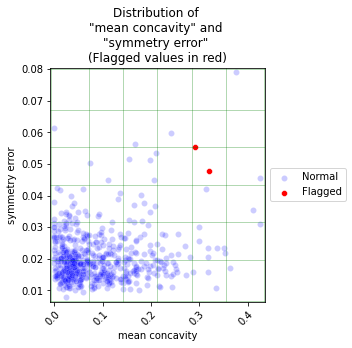

In [17]:
# Look at Issue 52 more closely

dc.display_detailed_results(issue_id_list=[52])

### MUCH_LARGER

### Column(s): "radius error" AND "mean texture"

**Issue ID**: 34

A strong pattern, and exceptions to the pattern, were found.


**Description**: "mean texture" is consistently an order of magnitude or more larger than "radius error", with<br>exceptions (where values may still be larger, but not by the normal extent).

**Number of exceptions**: 2 (0.3515% of rows)

**Examples of values NOT flagged**:

,radius error,mean texture
38,1.2140,25.20
300,1.1110,18.90
312,0.3265,13.37
347,0.3428,14.74
384,0.1833,13.72
441,0.5100,25.42
459,0.1781,28.20
514,0.3860,19.07
517,0.5079,20.26
540,0.2784,14.44


**Flagged values**:

,radius error,mean texture
0,1.095,10.38
212,2.873,18.47


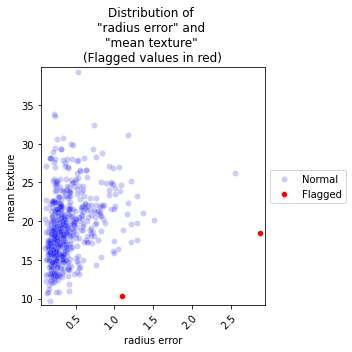

In [18]:
# Look at issue 34 more closely

dc.display_detailed_results(issue_id_list=[34])

Displaying results for tests: 'SIMILAR_WRT_RATIO'

### Column(s): "mean radius" AND "worst radius"

Pattern found (without exceptions)

**Description**: "mean radius" and "worst radius" have consistently similar values in terms of their ratio

**Examples**:

,mean radius,worst radius
37,13.030,13.300
298,14.260,16.220
310,11.700,12.610
345,10.260,10.880
382,12.050,12.570
439,14.020,14.910
457,13.210,14.350
512,13.400,16.410
515,11.340,12.470
538,7.729,9.077


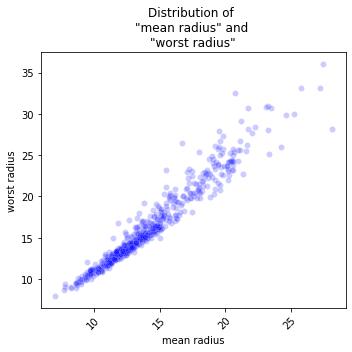

### Column(s): "mean perimeter" AND "worst perimeter"

Pattern found (without exceptions)

**Description**: "mean perimeter" and "worst perimeter" have consistently similar values in terms of their ratio

**Examples**:

,mean perimeter,worst perimeter
37,82.61,84.46
298,91.22,105.80
310,74.33,80.92
345,66.20,70.89
382,78.75,87.36
439,89.59,96.53
457,84.10,91.29
512,88.64,113.30
515,72.76,79.15
538,47.98,57.17


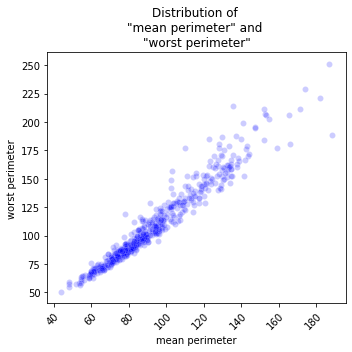

### Column(s): "mean smoothness" AND "worst smoothness"

Pattern found (without exceptions)

**Description**: "mean smoothness" and "worst smoothness" have consistently similar values in terms of their ratio

**Examples**:

,mean smoothness,worst smoothness
37,0.08983,0.09701
298,0.06576,0.09445
310,0.08814,0.12230
345,0.09882,0.13600
382,0.06935,0.08799
439,0.07966,0.10340
457,0.08791,0.12890
512,0.11060,0.15740
515,0.10490,0.14830
538,0.08098,0.12560


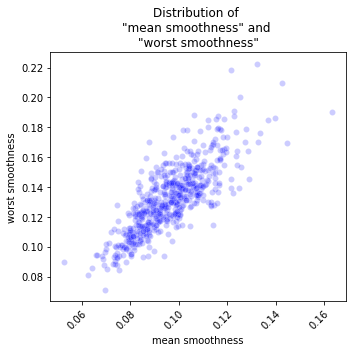

### Column(s): "mean texture" AND "worst texture"

**Issue ID**: 44

A strong pattern, and exceptions to the pattern, were found.


**Description**: "mean texture" and "worst texture" have consistently similar values in terms of their ratio, with<br>exceptions.

**Number of exceptions**: 1 (0.1757% of rows)

**Examples of values NOT flagged**:

,mean texture,worst texture
37,18.42,22.81
298,18.17,25.26
310,19.11,26.55
345,14.71,19.48
382,22.72,28.71
440,17.20,26.87
458,25.13,31.88
513,13.66,17.24
516,20.58,26.20
539,25.44,31.89


**Flagged values**:

,mean texture,worst texture
410,17.57,36.32


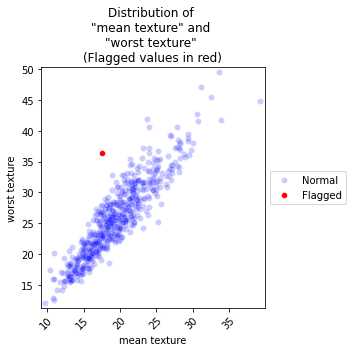

### Column(s): "mean smoothness" AND "worst fractal dimension"

**Issue ID**: 45

A strong pattern, and exceptions to the pattern, were found.


**Description**: "mean smoothness" and "worst fractal dimension" have consistently similar values in terms of their<br>ratio, with exceptions.

**Number of exceptions**: 2 (0.3515% of rows)

**Examples of values NOT flagged**:

,mean smoothness,worst fractal dimension
37,0.08983,0.06169
300,0.11500,0.09929
312,0.08794,0.08253
347,0.08875,0.08187
384,0.08363,0.07320
441,0.08331,0.07944
459,0.07984,0.07211
514,0.09215,0.06954
517,0.10370,0.09136
540,0.09984,0.08134


**Flagged values**:

,mean smoothness,worst fractal dimension
212,0.1142,0.05525
275,0.1225,0.06033


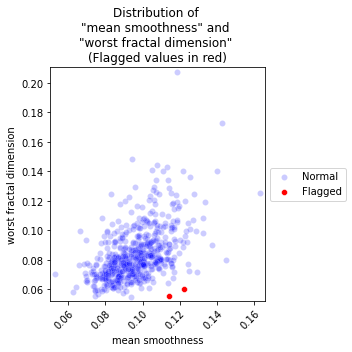

### Column(s): "mean fractal dimension" AND "worst fractal dimension"

**Issue ID**: 46

A strong pattern, and exceptions to the pattern, were found.


**Description**: "mean fractal dimension" and "worst fractal dimension" have consistently similar values in terms of<br>their ratio, with exceptions.

**Number of exceptions**: 2 (0.3515% of rows)

**Examples of values NOT flagged**:

,mean fractal dimension,worst fractal dimension
38,0.05504,0.05504
300,0.06552,0.09929
312,0.06140,0.08253
347,0.05912,0.08187
384,0.05594,0.07320
441,0.05407,0.07944
459,0.05952,0.07211
514,0.05915,0.06954
517,0.06188,0.09136
540,0.06782,0.08134


**Flagged values**:

,mean fractal dimension,worst fractal dimension
9,0.08243,0.2075
72,0.06487,0.1339


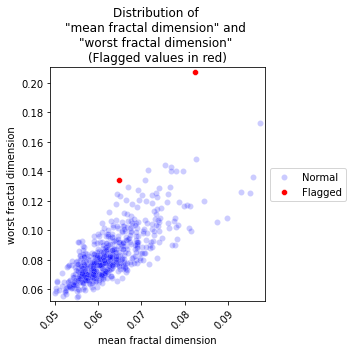

In [19]:
# Look at the SIMILAR_WRT_RATIO test more closely. This found several
# patterns without and several with exceptions. 

dc.display_detailed_results(test_id_list=['SIMILAR_WRT_RATIO'])